In [37]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run 1.Dublin_data_import.ipynb
import sys
sys.path.append('../') # Change path
from Functions import *
import math
import copy
%store -r random_numbers_matrix

In [38]:
def LR(x):
    return np.exp(-x/100)*0.01+0.00001

In [43]:
Y_updated = np.delete(Y,random_numbers_matrix[0].flatten().astype(int), axis=0)
connections = Y[random_numbers_matrix[0].flatten().astype(int), 0]

alpha_array = [0,1,2,3,4]
dim_array = [2,4,8,10,12,16,20,24]
Accuracy_dim_alpha = np.zeros((len(alpha_array),len(dim_array)))

n = 10000000
num_samples = 410 

In [44]:
l = 0
for dim in dim_array:
    mu = np.zeros(dim)
    identity_matrix = np.eye(dim) 
    cov_matrix = identity_matrix
    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

    True_posetiv = np.zeros(len(alpha_array))
    True_negativ = np.zeros(len(alpha_array))
    False_posetiv = np.zeros(len(alpha_array))
    False_negativ = np.zeros(len(alpha_array))

    a = 0 
    for alpha in alpha_array:
        prev_grad = 200
        grad = 0
        points_copy = copy.deepcopy(points)
        grad_sum = np.zeros(n) # Define the gradient sum
        k = 0

        while abs(prev_grad - grad) > 0.1: # stopping criteria
            print(prev_grad - grad)
            prev_grad = grad
            for i in range(1,num_samples+1): # Run over number of num_samples
                grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
                grad_sum[k] += np.sum((grad_now)**2)
                points_copy[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
            grad = grad_sum[k]
            k += 1

        point_a = [points_copy[i] for i in Y[random_numbers_matrix[0].flatten().astype(int),1]]
        point_b = [points_copy[i] for i in Y[random_numbers_matrix[0].flatten().astype(int),2]]
        points_a_np = np.array(point_a)
        points_b_np = np.array(point_b)

        distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
        sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

        True_posetiv[a] = np.sum(connections*sigmoid_value >= 0.5)
        False_posetiv[a] = np.sum(connections*sigmoid_value <= -0.5)
        True_negativ[a] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value <= 0))
        False_negativ[a] = np.sum((connections*sigmoid_value > 0) & (connections*sigmoid_value < 0.5))

        a += 1

    Accuracy_dim_alpha[:,l] = (True_posetiv+True_negativ)/(len(sigmoid_value))
    print(Accuracy_dim_alpha)
    
    l += 1

200
-364177.85865837656
208057.40921607328
42260.145632385786
21281.6582518184
13433.407676651463
9138.0929421927
6330.881936618534
4681.084646787334
3904.0713395220737
3640.1503330071355
3607.883620341985
3865.762914272127
4229.687102232565
4059.7916510879295
3447.340098186436
2856.8673367495867
2446.625188548762
2150.2301409088177
1888.6554744693603
1629.2742428596175
1375.0506139500321
1159.2045702753385
1011.9277390546704
935.4514318390939
907.8331798538693
899.4184719982968
885.732988310112
850.6062135499269
788.6901026942705
708.4185905636768
625.2756433938121
550.7851664562168
490.29778857093515
445.763702042821
416.20665512441155
397.9987788388462
387.09400592573365
380.25660410471755
373.97799522683636
363.74905677882543
345.66137168910154
318.73700361762076
285.3530582407948
249.5671108073193
215.11972005934058
184.36891576877406
158.16390232739923
136.20129936267767
117.53512771135775
101.0825960935681
86.01320582263088
71.92424381886212
58.79263069947592
46.81205022775703
3

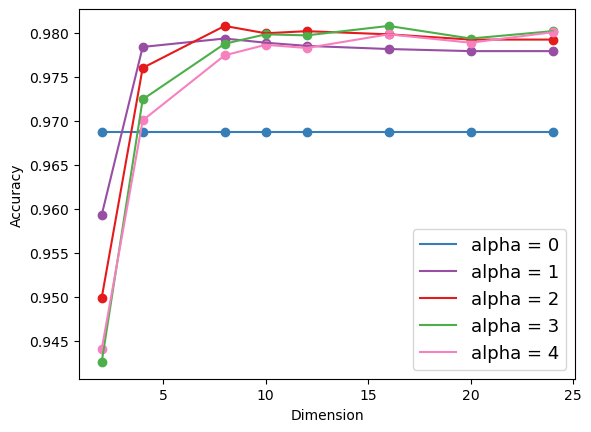

In [46]:
plt.plot(dim_array, Accuracy_dim_alpha[0], label='alpha = 0', color = '#377eb8')
plt.plot(dim_array, Accuracy_dim_alpha[1], label='alpha = 1', color = '#984ea3')
plt.plot(dim_array, Accuracy_dim_alpha[2], label='alpha = 2', color = '#e41a1c')
plt.plot(dim_array, Accuracy_dim_alpha[3], label='alpha = 3', color = '#4daf4a')
plt.plot(dim_array, Accuracy_dim_alpha[4], label='alpha = 4', color = '#f781bf')
plt.scatter(dim_array, Accuracy_dim_alpha[0], facecolors='#377eb8', edgecolors='#377eb8')
plt.scatter(dim_array, Accuracy_dim_alpha[1], facecolors='#984ea3', edgecolors='#984ea3')
plt.scatter(dim_array, Accuracy_dim_alpha[2], facecolors='#e41a1c', edgecolors='#e41a1c')
plt.scatter(dim_array, Accuracy_dim_alpha[3], facecolors='#4daf4a', edgecolors='#4daf4a')
plt.scatter(dim_array, Accuracy_dim_alpha[4], facecolors='#f781bf', edgecolors='#f781bf')
plt.ylabel('Accuracy')
plt.xlabel('Dimension')
plt.legend(fontsize=13)
plt.show()